## Observations and Insights 

In [18]:
# What is the ddof value supposed to be for the variance and std questions?
# Annotation of the linear regression required?
# Does my iteration process look appropriate?

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = study_results.merge(mouse_metadata, on="Mouse ID")

# Display the data table for preview
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [19]:
# Check the number of mice.
len(study_results["Mouse ID"].unique())  # 249
len(mouse_metadata["Mouse ID"].unique()) # 249

249

In [20]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupes = merged_data.duplicated(subset=["Mouse ID", "Timepoint"])
bad_mouse_ids = merged_data.loc[dupes, "Mouse ID"].unique()

In [21]:
# Optional: Get all the data for the duplicate mouse ID. 
opt_data = merged_data[merged_data["Mouse ID"] == bad_mouse_ids[0]]
opt_data.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26


In [22]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = merged_data[merged_data["Mouse ID"] != bad_mouse_ids[0]]

clean_mouse_metadata = mouse_metadata[mouse_metadata["Mouse ID"] != bad_mouse_ids[0]]
len(clean_mouse_metadata["Mouse ID"])  # Makes some questions easier later

248

In [23]:
# Check the number of mice in the clean DataFrame.
len(clean_data["Mouse ID"].unique())     # Should be 248 after dropping g989


248

## Summary Statistics

In [24]:
# Method 1:  Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
drugs_tested = (clean_data.drop_duplicates(subset=["Mouse ID"]))["Drug Regimen"].unique()
# ['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn',
#       'Ramicane', 'Zoniferol', 'Propriva', 'Placebo', 'Ceftamin']

end_time_df = clean_data[clean_data["Timepoint"] == 45]
mean_vals   = end_time_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_vals = end_time_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
std_vals    = end_time_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
var_vals    = end_time_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
sem_vals    = end_time_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# end_time_df.groupby("Drug Regimen")["Tumor Volume (mm3)"]
# end_time_df
# sample = end_time_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sample(10)

disp_df = pd.DataFrame({"Mean": mean_vals, "Median": median_vals, "STD": std_vals, "Variance": var_vals, "SEM": sem_vals})
disp_df


,Mean,Median,STD,Variance,SEM
Drug Regimen,,,,,
Capomulin,36.236114,37.311846,5.608969,31.460537,1.223977
Ceftamin,64.132421,64.299830,3.253497,10.585242,0.902358
Infubinol,65.755562,66.083066,3.433282,11.787426,1.144427
Ketapril,70.662958,69.872251,4.819674,23.229260,1.453186
Naftisol,69.265506,69.563621,5.106770,26.079104,1.416363
Placebo,68.084082,69.042841,4.483167,20.098783,1.351726
Propriva,66.258529,64.957562,4.996728,24.967290,1.888586
Ramicane,34.955595,34.848627,5.486439,30.101010,1.226805
Stelasyn,68.438310,69.299149,5.228845,27.340818,1.576556


In [25]:
# Method 2(optional): Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function. (https://pandas.pydata.org/pandas-docs/version/0.22.0/generated/pandas.core.groupby.DataFrameGroupBy.agg.html)

end_time_df = clean_data[clean_data["Timepoint"] == 45]
end_time_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean","median","std","var", "sem"])


,mean,median,std,var,sem
Drug Regimen,,,,,
Capomulin,36.236114,37.311846,5.608969,31.460537,1.223977
Ceftamin,64.132421,64.299830,3.253497,10.585242,0.902358
Infubinol,65.755562,66.083066,3.433282,11.787426,1.144427
Ketapril,70.662958,69.872251,4.819674,23.229260,1.453186
Naftisol,69.265506,69.563621,5.106770,26.079104,1.416363
Placebo,68.084082,69.042841,4.483167,20.098783,1.351726
Propriva,66.258529,64.957562,4.996728,24.967290,1.888586
Ramicane,34.955595,34.848627,5.486439,30.101010,1.226805
Stelasyn,68.438310,69.299149,5.228845,27.340818,1.576556


## Bar and Pie Charts

Text(0, 0.5, 'Number of Data Points')

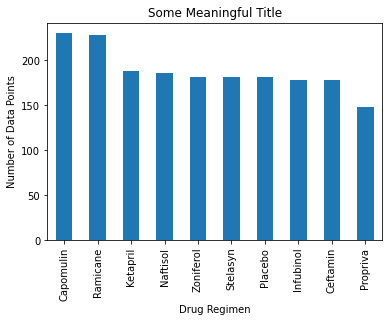

In [41]:
# Use Pandas to generate a bar plot showing the total number of mice in each treatment regimen 
# throughout the course of the study. 

series = clean_data.groupby("Drug Regimen")["Mouse ID"].agg("count")
series.sort_values(inplace=True, ascending=False)

bar_chart = series.plot.bar(title="Some Meaningful Title")
bar_chart.set_ylabel("Number of Data Points")

## Note: this plot will be identical to the one that uses Pyplot

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

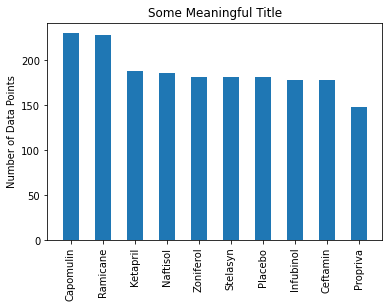

In [47]:
# Use Pyplot to generate a bar plot showing the total number of mice treatment in each treatment regimen throughout the course of the study.

##  Note: this plot will be identical to the one that uses Pandas
series = clean_data.groupby("Drug Regimen")["Mouse ID"].agg("count")
series.sort_values(inplace=True, ascending=False)

plt.bar(series.index.values, series.values, width=0.5)
plt.title("Some Meaningful Title")
plt.ylabel("Number of Data Points")
plt.xticks(rotation=90)


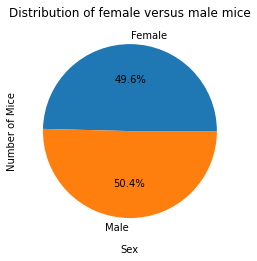

<Figure size 432x288 with 0 Axes>

In [48]:
# Use Pandas to generate a pie plot showing the distribution of female versus male mice
len(clean_mouse_metadata)
sex_groups = clean_mouse_metadata.groupby("Sex")
mouse_sex = sex_groups["Mouse ID"].count()

pie_chart = mouse_sex.plot(kind="pie", title="Distribution of female versus male mice", autopct='%1.1f%%')
pie_chart.set_xlabel("Sex")
pie_chart.set_ylabel("Number of Mice")

plt.show()
plt.tight_layout()

## Note: this plot will be identical to the one that uses Pyplot

Text(0, 0.5, 'Number of Mice')

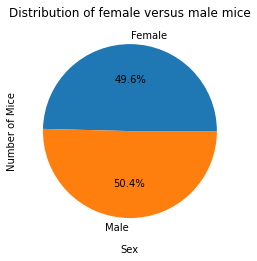

In [49]:
# Use Pyplot to generate a pie plot showing the distribution of female versus male mice
sex_groups = clean_mouse_metadata.groupby("Sex")
mouse_sex = sex_groups["Mouse ID"].count()

plt.pie(mouse_sex.values, labels=mouse_sex.index.values, autopct='%1.1f%%')
plt.title("Distribution of female versus male mice")
plt.xlabel("Sex")
plt.ylabel("Number of Mice")

##  Note: this plot will be identical to the one that uses Pandas

## Quartiles, Outliers and Boxplots

In [50]:
# Calculate the final tumor volume of each mouse across four of the drug regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# make the dataset smaller first
final_four = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
ff_data = clean_data.loc[ (clean_data["Drug Regimen"] == "Capomulin") | (clean_data["Drug Regimen"] == "Ramicane") |
                          (clean_data["Drug Regimen"] == "Infubinol") | (clean_data["Drug Regimen"] == "Ceftamin")
                        ]
#ff_data is short for final_four_data

# Start by getting the last (latest) timepoint for each mouse
#ff_data.groupby("Mouse ID", sort=False)["Timepoint"].max()
final_timepoint_rows = ff_data.groupby("Mouse ID", sort=False)["Timepoint"].transform(max) == ff_data["Timepoint"]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_timepoint_ff_data = ff_data[final_timepoint_rows]


last_timepoint_ff_data.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
9,b128,45,38.982878,2,Capomulin,Female,9,22
214,c326,5,36.321346,0,Infubinol,Female,18,25
224,c139,45,72.226731,2,Infubinol,Male,11,28
226,v339,5,46.250112,0,Infubinol,Male,20,26
233,a577,30,57.031862,2,Infubinol,Female,6,25


In [51]:
# Put the four drug regimens into a list that can be iterated over in a for-loop 
# (and later used for plot labels)
final_four = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
final_four

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

for drug in final_four:
    
    this_drug_tumor_vols = last_timepoint_ff_data[last_timepoint_ff_data["Drug Regimen"] == drug]["Tumor Volume (mm3)"]
    #data = [capomulin_vols.array, ramicane_vols.array, infubinol_vols.array, ceftamin_vols.array]

    print(f"This is the IQR data for {drug}:")

    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = this_drug_tumor_vols.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile of tumor volume is: {lowerq}")
    print(f"The upper quartile of tumor volume is: {upperq}")
    print(f"The interquartile range of tumor volumes is: {iqr}")
    print(f"The the median of tumor volume is: {quartiles[0.5]} ")

    # Locate the rows which contain mice on each drug and get the tumor volumes

    # add subset 
    # ???????????????????
    
    # Determine outliers using upper and lower bounds

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.\n")    
    

This is the IQR data for Capomulin:
The lower quartile of tumor volume is: 32.37735684
The upper quartile of tumor volume is: 40.1592203
The interquartile range of tumor volumes is: 7.781863460000004
The the median of tumor volume is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.

This is the IQR data for Ramicane:
The lower quartile of tumor volume is: 31.56046955
The upper quartile of tumor volume is: 40.65900627
The interquartile range of tumor volumes is: 9.098536719999998
The the median of tumor volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.

This is the IQR data for Infubinol:
The lower quartile of tumor volume is: 54.04860769
The upper quartile of tumor volume is: 65.52574285
The interquartile range of tumor volumes is: 11.477135160000003
The the median of tumor volume is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values

[Text(0, 0, 'Capomulin'),
 Text(0, 0, 'Ramicane'),
 Text(0, 0, 'Infubinol'),
 Text(0, 0, 'Ceftamin')]

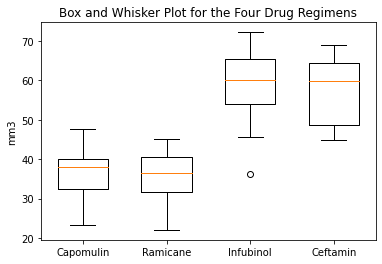

In [55]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
capomulin_vols = last_timepoint_ff_data[last_timepoint_ff_data["Drug Regimen"] == final_four[0]]["Tumor Volume (mm3)"]
ramicane_vols  = last_timepoint_ff_data[last_timepoint_ff_data["Drug Regimen"] == final_four[1]]["Tumor Volume (mm3)"]
infubinol_vols = last_timepoint_ff_data[last_timepoint_ff_data["Drug Regimen"] == final_four[2]]["Tumor Volume (mm3)"]
ceftamin_vols  = last_timepoint_ff_data[last_timepoint_ff_data["Drug Regimen"] == final_four[3]]["Tumor Volume (mm3)"]

data = [capomulin_vols.array, ramicane_vols.array, infubinol_vols.array, ceftamin_vols.array]

fig = plt.figure()
ax = plt.axes()

plt.boxplot(capomulin_vols.array, positions = [1], widths = 0.6)
plt.boxplot(ramicane_vols.array, positions = [2], widths = 0.6)
plt.boxplot(infubinol_vols.array, positions = [3], widths = 0.6)
plt.boxplot(ceftamin_vols.array, positions = [4], widths = 0.6)

plt.title("Box and Whisker Plot for the Four Drug Regimens")
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_xticklabels(final_four)

## Line and Scatter Plots

Text(0.5, 0, 'Timepoint')

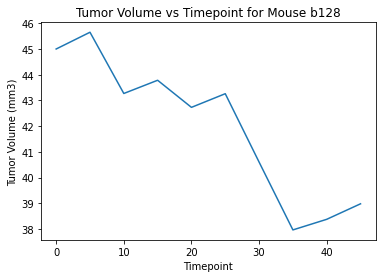

In [61]:
# Generate a line plot of tumor volume vs. timepoint for a mouse treated with Capomulin
fig = plt.figure()
ax = plt.axes()

b128_data = ff_data[ff_data["Mouse ID"] == "b128"][["Timepoint","Tumor Volume (mm3)"]]

plt.plot(b128_data["Timepoint"], b128_data["Tumor Volume (mm3)"])
plt.title("Tumor Volume vs Timepoint for Mouse b128")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint")

Text(0.5, 0, 'Body Weight (g)')

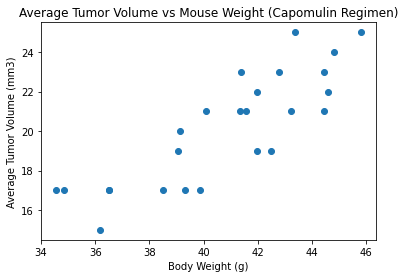

In [57]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen. 
# Note: this means mouse weight goes on the x-axis, with average tumor volume on the y-axis. 
fig = plt.figure()
ax = plt.axes()

ff_data[ff_data["Drug Regimen"] == "Capomulin"]  #[["Timepoint","Tumor Volume (mm3)"]]
grouped = ff_data[ff_data["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")

avg_tumor_vol = grouped["Weight (g)"].mean()
body_weight =  grouped["Tumor Volume (mm3)"].mean()

plt.scatter(body_weight, avg_tumor_vol)
plt.title("Average Tumor Volume vs Mouse Weight (Capomulin Regimen)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Body Weight (g)")

## Correlation and Regression

In [58]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen.
correlation = st.pearsonr(body_weight, avg_tumor_vol )
print(f"The correlation between Mouse Body Weight and Average Tumor Volume is {round(correlation[0],2)}")

The correlation between Mouse Body Weight and Average Tumor Volume is 0.84


Text(0.5, 0, 'Body Weight (g)')

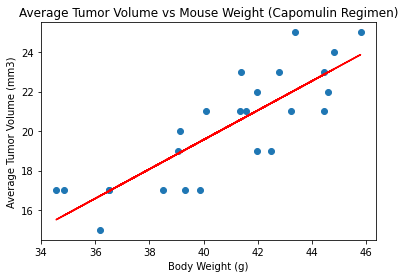

In [59]:
from scipy.stats import linregress

(slope, intercept, rvalue, pvalue, stderr) = linregress(body_weight, avg_tumor_vol)
regress_values = body_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(body_weight, avg_tumor_vol)
plt.plot(body_weight,regress_values,"r-")
# plt.annotate(line_eq,(1,1),fontsize=15,color="red")

plt.title("Average Tumor Volume vs Mouse Weight (Capomulin Regimen)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Body Weight (g)")